In [179]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
import pickle

In [15]:
chess_img = cv2.imread("chess.png")
chess_img = chess_img[:, :, [2, 1, 0]]

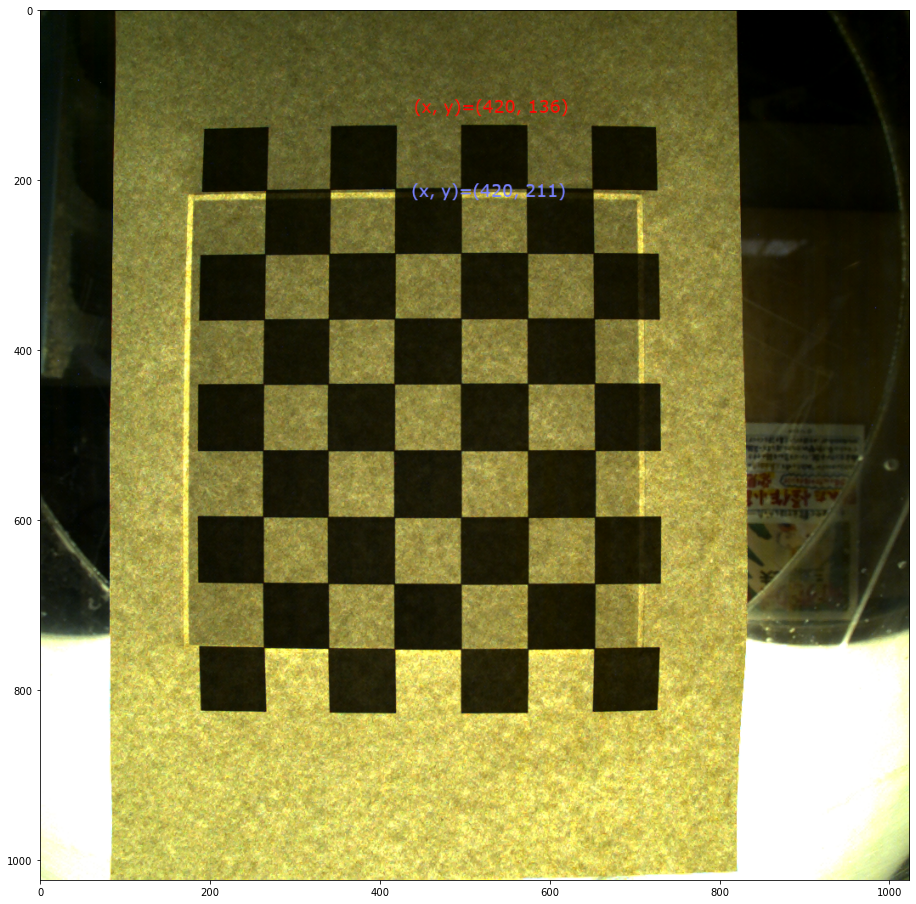

In [16]:
plt.figure(figsize=(16, 16))
plt.imshow(chess_img)
plt.show()

In [17]:
from_red_to_blue_mm = 21.5
from_red_to_blue_px = 211 - 136

mm2px = from_red_to_blue_px / from_red_to_blue_mm
px2mm = 1 / mm2px

In [18]:
from_origin_to_red_mm = 57.5  # mm
from_origin_to_red_px = from_origin_to_red_mm * mm2px

origin_x = 420
origin_y = 136 - from_origin_to_red_px

print(origin_x, origin_y)

420 -64.58139534883722


In [19]:
20 * px2mm * 50

286.6666666666667

In [20]:
fps = 50

In [21]:
res1 = np.zeros((1, 4))
res2 = np.zeros((1, 4))
res3 = np.zeros((1, 4))
res15 = np.zeros((1, 4))
res25 = np.zeros((1, 4))

In [22]:
for c in range(1, 11):
    for t in range(6, 5000):
        try:
            tmp = np.loadtxt(f"/Users/loblium/data/c/nearest_skip_5/cbi_q_1/{c}/{t:06}.csv", delimiter=",", skiprows=1)
        except OSError:
            continue
        if tmp.ndim == 1:
            if len(tmp) > 0:
                tmp = tmp[np.newaxis, :]
            else:
                continue

        tmp[:, 0] += 90
        tmp[:, 1] += 290

        tmp[:, 0] -= origin_x
        tmp[:, 1] -= origin_y
        tmp[:, 2] *= fps
        tmp[:, 3] *= fps
        tmp *= px2mm

        tmp2 = np.zeros_like(tmp)
        tmp2[:, 0] = np.sqrt(tmp[:, 0]**2 + tmp[:, 1]**2)  # r
        tmp2[:, 1] = np.arctan2(tmp[:, 1], tmp[:, 0])  # phi
        tmp2[:, 2] = tmp[:, 2] * np.cos(tmp2[:, 1]) + tmp[:, 3] * np.sin(tmp2[:, 1])  # dv_r
        tmp2[:, 3] = (tmp[:, 2] * np.sin(tmp2[:, 1]) + tmp[:, 3] * np.cos(tmp2[:, 1]))  # dv_theta

        res1 = np.vstack((res1, tmp2))

In [23]:
for c in range(1, 11):
    for t in range(6, 5000):
        try:
            tmp = np.loadtxt(f"/Users/loblium/data/c/nearest_skip_5/cbi_q_2/{c}/{t:06}.csv", delimiter=",", skiprows=1)
        except OSError:
            continue
        if tmp.ndim == 1:
            if len(tmp) > 0:
                tmp = tmp[np.newaxis, :]
            else:
                continue

        tmp[:, 0] += 90
        tmp[:, 1] += 290

        tmp[:, 0] -= origin_x
        tmp[:, 1] -= origin_y
        tmp[:, 2] *= fps
        tmp[:, 3] *= fps
        tmp *= px2mm

        tmp2 = np.zeros_like(tmp)
        tmp2[:, 0] = np.sqrt(tmp[:, 0]**2 + tmp[:, 1]**2)  # r
        tmp2[:, 1] = np.arctan2(tmp[:, 1], tmp[:, 0])  # phi
        tmp2[:, 2] = tmp[:, 2] * np.cos(tmp2[:, 1]) + tmp[:, 3] * np.sin(tmp2[:, 1])  # dv_r
        tmp2[:, 3] = (tmp[:, 2] * np.sin(tmp2[:, 1]) + tmp[:, 3] * np.cos(tmp2[:, 1]))  # dv_theta

        res2 = np.vstack((res2, tmp2))

/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: loadtxt: Empty input file: "/Users/loblium/data/c/nearest_skip_5/cbi_q_2/4/003079.csv"
  after removing the cwd from sys.path.
/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: loadtxt: Empty input file: "/Users/loblium/data/c/nearest_skip_5/cbi_q_2/4/003083.csv"
  after removing the cwd from sys.path.
/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: loadtxt: Empty input file: "/Users/loblium/data/c/nearest_skip_5/cbi_q_2/4/003084.csv"
  after removing the cwd from sys.path.
/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: loadtxt: Empty input file: "/Users/loblium/data/c/nearest_skip_5/cbi_q_2/7/002178.csv"
  after removing the cwd from sys.path.
/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/ipyke

In [24]:
for c in range(1, 11):
    for t in range(6, 5000):
        try:
            tmp = np.loadtxt(f"/Users/loblium/data/c/nearest_skip_5/cbi_q_3/{c}/{t:06}.csv", delimiter=",", skiprows=1)
        except OSError:
            continue
        if tmp.ndim == 1:
            if len(tmp) > 0:
                tmp = tmp[np.newaxis, :]
            else:
                continue

        tmp[:, 0] += 90
        tmp[:, 1] += 290

        tmp[:, 0] -= origin_x
        tmp[:, 1] -= origin_y
        tmp[:, 2] *= fps
        tmp[:, 3] *= fps
        tmp *= px2mm

        tmp2 = np.zeros_like(tmp)
        tmp2[:, 0] = np.sqrt(tmp[:, 0]**2 + tmp[:, 1]**2)  # r
        tmp2[:, 1] = np.arctan2(tmp[:, 1], tmp[:, 0])  # phi
        tmp2[:, 2] = tmp[:, 2] * np.cos(tmp2[:, 1]) + tmp[:, 3] * np.sin(tmp2[:, 1])  # dv_r
        tmp2[:, 3] = (tmp[:, 2] * np.sin(tmp2[:, 1]) + tmp[:, 3] * np.cos(tmp2[:, 1]))  # dv_theta

        res3 = np.vstack((res3, tmp2))

/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: loadtxt: Empty input file: "/Users/loblium/data/c/nearest_skip_5/cbi_q_3/10/004815.csv"
  after removing the cwd from sys.path.
/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: loadtxt: Empty input file: "/Users/loblium/data/c/nearest_skip_5/cbi_q_3/10/004816.csv"
  after removing the cwd from sys.path.
/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: loadtxt: Empty input file: "/Users/loblium/data/c/nearest_skip_5/cbi_q_3/10/004817.csv"
  after removing the cwd from sys.path.
/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: loadtxt: Empty input file: "/Users/loblium/data/c/nearest_skip_5/cbi_q_3/10/004818.csv"
  after removing the cwd from sys.path.
/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/i

In [25]:
for c in range(1, 11):
    for t in range(6, 5000):
        try:
            tmp = np.loadtxt(f"/Users/loblium/data/c/nearest_skip_5/cbi_q_15/{c}/{t:06}.csv", delimiter=",", skiprows=1)
        except OSError:
            continue
        if tmp.ndim == 1:
            if len(tmp) > 0:
                tmp = tmp[np.newaxis, :]
            else:
                continue

        tmp[:, 0] += 90
        tmp[:, 1] += 290

        tmp[:, 0] -= origin_x
        tmp[:, 1] -= origin_y
        tmp[:, 2] *= fps
        tmp[:, 3] *= fps
        tmp *= px2mm

        tmp2 = np.zeros_like(tmp)
        tmp2[:, 0] = np.sqrt(tmp[:, 0]**2 + tmp[:, 1]**2)  # r
        tmp2[:, 1] = np.arctan2(tmp[:, 1], tmp[:, 0])  # phi
        tmp2[:, 2] = tmp[:, 2] * np.cos(tmp2[:, 1]) + tmp[:, 3] * np.sin(tmp2[:, 1])  # dv_r
        tmp2[:, 3] = (tmp[:, 2] * np.sin(tmp2[:, 1]) + tmp[:, 3] * np.cos(tmp2[:, 1]))  # dv_theta

        res15 = np.vstack((res15, tmp2))

/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: loadtxt: Empty input file: "/Users/loblium/data/c/nearest_skip_5/cbi_q_15/9/000096.csv"
  after removing the cwd from sys.path.
/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: loadtxt: Empty input file: "/Users/loblium/data/c/nearest_skip_5/cbi_q_15/9/000099.csv"
  after removing the cwd from sys.path.
/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: loadtxt: Empty input file: "/Users/loblium/data/c/nearest_skip_5/cbi_q_15/9/000100.csv"
  after removing the cwd from sys.path.


In [26]:
for c in range(1, 11):
    for t in range(6, 5000):
        try:
            tmp = np.loadtxt(f"/Users/loblium/data/c/nearest_skip_5/cbi_q_25/{c}/{t:06}.csv", delimiter=",", skiprows=1)
        except OSError:
            continue
        if tmp.ndim == 1:
            if len(tmp) > 0:
                tmp = tmp[np.newaxis, :]
            else:
                continue

        tmp[:, 0] += 90
        tmp[:, 1] += 290

        tmp[:, 0] -= origin_x
        tmp[:, 1] -= origin_y
        tmp[:, 2] *= fps
        tmp[:, 3] *= fps
        tmp *= px2mm

        tmp2 = np.zeros_like(tmp)
        tmp2[:, 0] = np.sqrt(tmp[:, 0]**2 + tmp[:, 1]**2)  # r
        tmp2[:, 1] = np.arctan2(tmp[:, 1], tmp[:, 0])  # phi
        tmp2[:, 2] = tmp[:, 2] * np.cos(tmp2[:, 1]) + tmp[:, 3] * np.sin(tmp2[:, 1])  # dv_r
        tmp2[:, 3] = (tmp[:, 2] * np.sin(tmp2[:, 1]) + tmp[:, 3] * np.cos(tmp2[:, 1]))  # dv_theta

        res25 = np.vstack((res25, tmp2))

/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: loadtxt: Empty input file: "/Users/loblium/data/c/nearest_skip_5/cbi_q_25/10/003479.csv"
  after removing the cwd from sys.path.
/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: loadtxt: Empty input file: "/Users/loblium/data/c/nearest_skip_5/cbi_q_25/10/003480.csv"
  after removing the cwd from sys.path.
/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: loadtxt: Empty input file: "/Users/loblium/data/c/nearest_skip_5/cbi_q_25/10/003481.csv"
  after removing the cwd from sys.path.
/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: loadtxt: Empty input file: "/Users/loblium/data/c/nearest_skip_5/cbi_q_25/10/003483.csv"
  after removing the cwd from sys.path.
/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packag

In [27]:
res1 = res1[1:]
res2 = res2[1:]
res3 = res3[1:]
res15 = res15[1:]
res25 = res25[1:]

In [28]:
r = np.linspace(1, 250, 10000)
a = 4000
y = a * r**(-1)

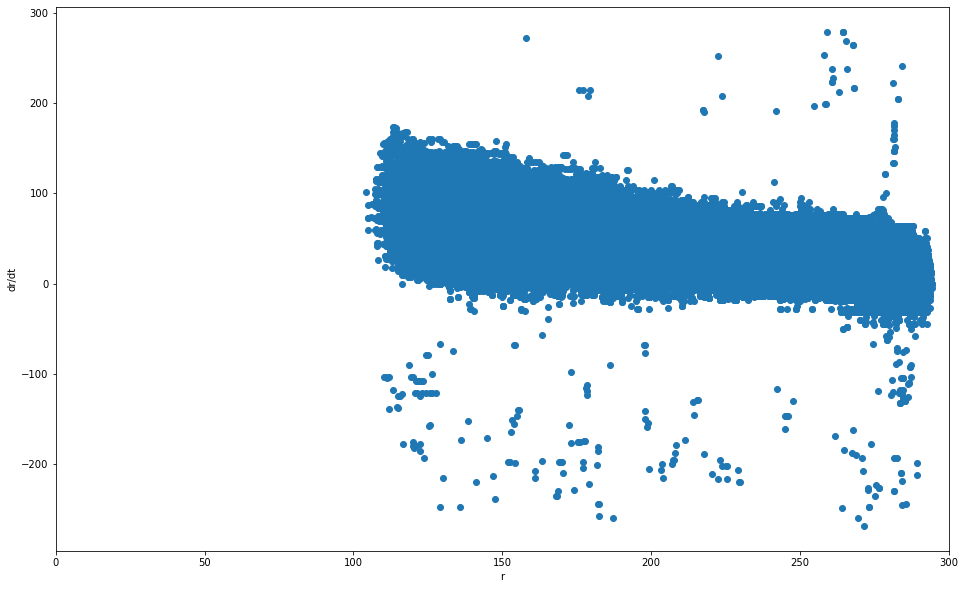

In [76]:
fig, ax = plt.subplots(figsize=(16, 10))
plt.xlabel("r")
plt.ylabel("dr/dt")
plt.xlim(0, 300)
ax.scatter(res1[:, 0], res1[:, 2], alpha=1, zorder=1)
# ax.scatter(res15[:, 0], res15[:, 2], s=2, alpha=0.1, zorder=2)
# ax.scatter(res2[:, 0], res2[:, 2], s=2, alpha=0.1, zorder=3)
# ax.scatter(res25[:, 0], res25[:, 2], s=2, alpha=0.1, zorder=4)
# ax.scatter(res3[:, 0], res3[:, 2], s=2, alpha=0.1, zorder=5)
plt.show()

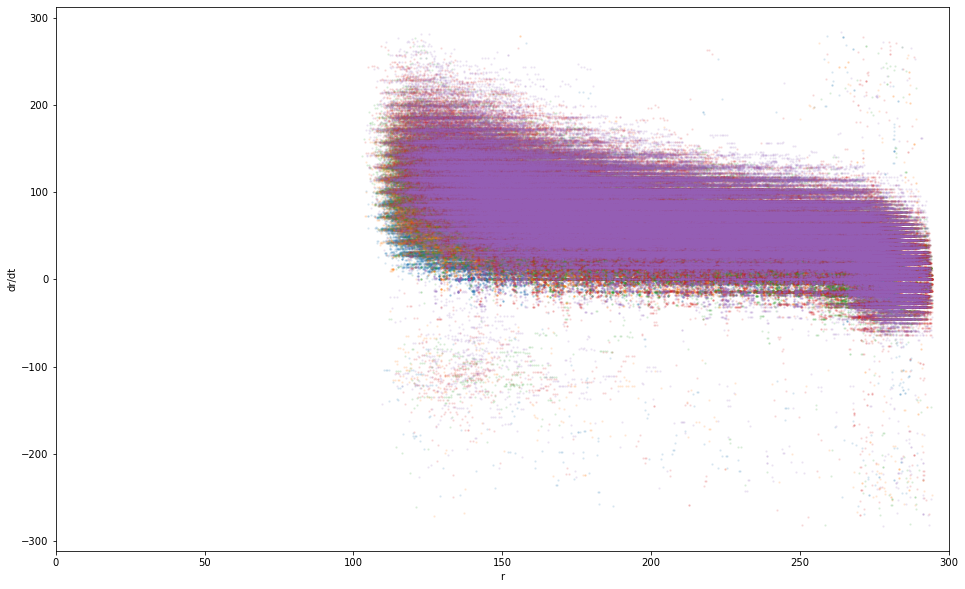

In [48]:
fig, ax = plt.subplots(figsize=(16, 10))
plt.xlabel("r")
plt.ylabel("dr/dt")
plt.xlim(0, 300)
ax.scatter(res1[:, 0], res1[:, 2], s=2, alpha=0.1, zorder=1)
ax.scatter(res15[:, 0], res15[:, 2], s=2, alpha=0.1, zorder=2)
ax.scatter(res2[:, 0], res2[:, 2], s=2, alpha=0.1, zorder=3)
ax.scatter(res25[:, 0], res25[:, 2], s=2, alpha=0.1, zorder=4)
ax.scatter(res3[:, 0], res3[:, 2], s=2, alpha=0.1, zorder=5)
plt.show()

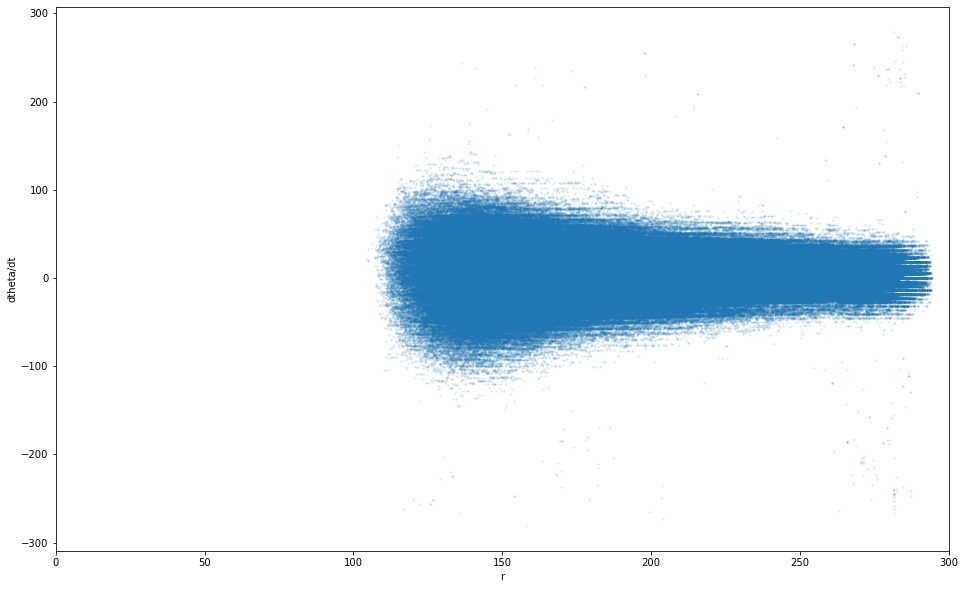

In [49]:
fig, ax = plt.subplots(figsize=(16, 10))
plt.xlabel("r")
plt.ylabel("dtheta/dt")
plt.xlim(0, 300)
ax.scatter(res1[:, 0], res1[:, 3], s=2, alpha=0.1, zorder=1)
plt.show()

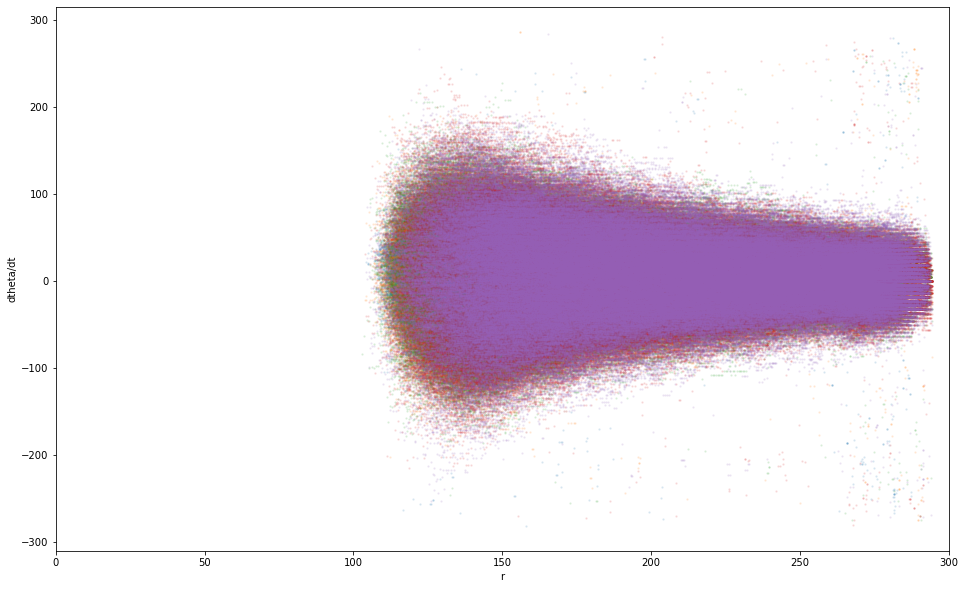

In [30]:
fig, ax = plt.subplots(figsize=(16, 10))
plt.xlabel("r")
plt.ylabel("dtheta/dt")
plt.xlim(0, 300)
ax.scatter(res1[:, 0], res1[:, 3], s=2, alpha=0.1, zorder=1)
ax.scatter(res15[:, 0], res15[:, 3], s=2, alpha=0.1, zorder=2)
ax.scatter(res2[:, 0], res2[:, 3], s=2, alpha=0.1, zorder=3)
ax.scatter(res25[:, 0], res25[:, 3], s=2, alpha=0.1, zorder=4)
ax.scatter(res3[:, 0], res3[:, 3], s=2, alpha=0.1, zorder=5)
plt.show()

In [154]:
columns = ['r', 'theta', 'u_r', 'u_theta']
res1_sort = pd.DataFrame(data=res1, columns=columns, dtype='float').sort_values(by='r', ascending=True).values
res2_sort = pd.DataFrame(data=res2, columns=columns, dtype='float').sort_values(by='r', ascending=True).values
res3_sort = pd.DataFrame(data=res3, columns=columns, dtype='float').sort_values(by='r', ascending=True).values
res15_sort = pd.DataFrame(data=res15, columns=columns, dtype='float').sort_values(by='r', ascending=True).values
res25_sort = pd.DataFrame(data=res25, columns=columns, dtype='float').sort_values(by='r', ascending=True).values

In [155]:
r_ur_err_1 = np.zeros((3501, 3))
r_ur_err_2 = np.zeros((3501, 3))
r_ur_err_3 = np.zeros((3501, 3))
r_ur_err_15 = np.zeros((3501, 3))
r_ur_err_25 = np.zeros((3501, 3))

In [156]:
_iter = 50

In [157]:
for i in tqdm(range(0, 3501, _iter)):
    res1_sort_l = res1_sort[np.where(res1_sort[:, 0] >= i/10)]
    res1_sort_lr = res1_sort_l[np.where(res1_sort_l[:, 0] < (i+_iter)/10)]
    r_ur_err_1[i, 0] = i
    r_ur_err_1[i, 1] = np.mean(res1_sort_lr, axis=0)[2]
    r_ur_err_1[i, 2] = np.std(res1_sort_lr, axis=0)[2]

  0%|          | 0/71 [00:00<?, ?it/s]/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/numpy/core/_methods.py:252: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
100%|██████████| 71/71 [00:00<00:00, 80.44it/

In [158]:
for i in tqdm(range(0, 3501, _iter)):
    res2_sort_l = res2_sort[np.where(res2_sort[:, 0] >= i/10)]
    res2_sort_lr = res2_sort_l[np.where(res2_sort_l[:, 0] < (i+_iter)/10)]
    r_ur_err_2[i, 0] = i
    r_ur_err_2[i, 1] = np.mean(res2_sort_lr, axis=0)[2]
    r_ur_err_2[i, 2] = np.std(res2_sort_lr, axis=0)[2]

  0%|          | 0/71 [00:00<?, ?it/s]/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/numpy/core/_methods.py:252: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
100%|██████████| 71/71 [00:00<00:00, 141.31it

In [159]:
for i in tqdm(range(0, 3501, _iter)):
    res3_sort_l = res3_sort[np.where(res3_sort[:, 0] >= i/10)]
    res3_sort_lr = res3_sort_l[np.where(res3_sort_l[:, 0] < (i+_iter)/10)]
    r_ur_err_3[i, 0] = i
    r_ur_err_3[i, 1] = np.mean(res3_sort_lr, axis=0)[2]
    r_ur_err_3[i, 2] = np.std(res3_sort_lr, axis=0)[2]

  0%|          | 0/71 [00:00<?, ?it/s]/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/numpy/core/_methods.py:252: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
100%|██████████| 71/71 [00:00<00:00, 120.84it

In [160]:
for i in tqdm(range(0, 3501, _iter)):
    res15_sort_l = res15_sort[np.where(res15_sort[:, 0] >= i/10)]
    res15_sort_lr = res15_sort_l[np.where(res15_sort_l[:, 0] < (i+_iter)/10)]
    r_ur_err_15[i, 0] = i
    r_ur_err_15[i, 1] = np.mean(res15_sort_lr, axis=0)[2]
    r_ur_err_15[i, 2] = np.std(res15_sort_lr, axis=0)[2]

  0%|          | 0/71 [00:00<?, ?it/s]/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/numpy/core/_methods.py:252: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
100%|██████████| 71/71 [00:00<00:00, 108.62it

In [161]:
for i in tqdm(range(0, 3501, _iter)):
    res25_sort_l = res25_sort[np.where(res25_sort[:, 0] >= i/10)]
    res25_sort_lr = res25_sort_l[np.where(res25_sort_l[:, 0] < (i+_iter)/10)]
    r_ur_err_25[i, 0] = i
    r_ur_err_25[i, 1] = np.mean(res25_sort_lr, axis=0)[2]
    r_ur_err_25[i, 2] = np.std(res25_sort_lr, axis=0)[2]

  0%|          | 0/71 [00:00<?, ?it/s]/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/numpy/core/_methods.py:252: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
100%|██████████| 71/71 [00:00<00:00, 121.12it

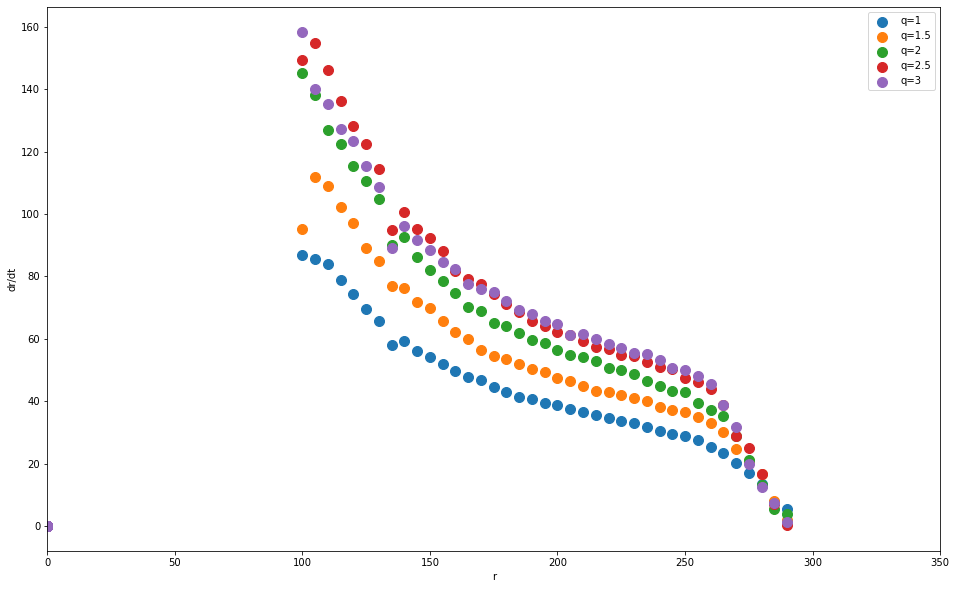

In [162]:
fig, ax = plt.subplots(figsize=(16, 10))
plt.xlabel("r")
plt.ylabel("dr/dt")
plt.xlim(0, 350)
# plt.ylim(0, 120)

ax.scatter(r_ur_err_1[:, 0]/10, r_ur_err_1[:, 1], s=100, label="q=1")
ax.scatter(r_ur_err_15[:, 0]/10, r_ur_err_15[:, 1], s=100, label="q=1.5")
ax.scatter(r_ur_err_2[:, 0]/10, r_ur_err_2[:, 1], s=100, label="q=2")
ax.scatter(r_ur_err_25[:, 0]/10, r_ur_err_25[:, 1], s=100, label="q=2.5")
ax.scatter(r_ur_err_3[:, 0]/10, r_ur_err_3[:, 1], s=100, label="q=3")

plt.legend()

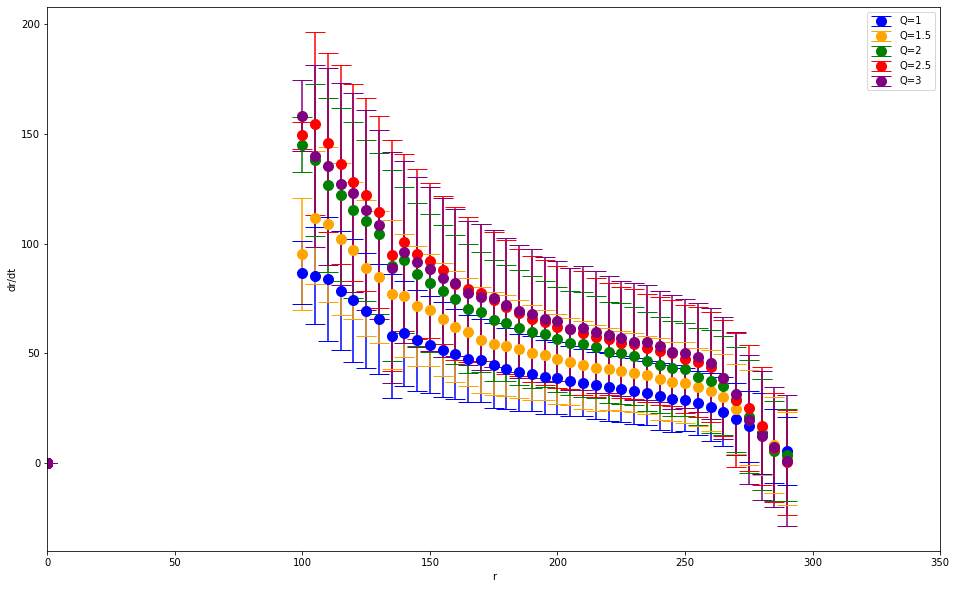

In [163]:
fig, ax = plt.subplots(figsize=(16, 10))
plt.xlabel("r")
plt.ylabel("dr/dt")
plt.xlim(0, 350)
# plt.ylim(0, 120)

ax.errorbar(r_ur_err_1[:, 0]/10, r_ur_err_1[:, 1], yerr=r_ur_err_1[:, 2], capsize=10, fmt='o', markersize=10, ecolor='b', markeredgecolor="b", color='b', label="Q=1")
ax.errorbar(r_ur_err_15[:, 0]/10, r_ur_err_15[:, 1], yerr=r_ur_err_15[:, 2], capsize=10, fmt='o', markersize=10, ecolor='orange', markeredgecolor="orange", color='orange', label="Q=1.5")
ax.errorbar(r_ur_err_2[:, 0]/10, r_ur_err_2[:, 1], yerr=r_ur_err_2[:, 2], capsize=10, fmt='o', markersize=10, ecolor='g', markeredgecolor="g", color='g', label="Q=2")
ax.errorbar(r_ur_err_25[:, 0]/10, r_ur_err_25[:, 1], yerr=r_ur_err_25[:, 2], capsize=10, fmt='o', markersize=10, ecolor='r', markeredgecolor="r", color='r', label="Q=2.5")
ax.errorbar(r_ur_err_3[:, 0]/10, r_ur_err_3[:, 1], yerr=r_ur_err_3[:, 2], capsize=10, fmt='o', markersize=10, ecolor='purple', markeredgecolor="purple", color='purple', label="Q=3")

plt.legend()

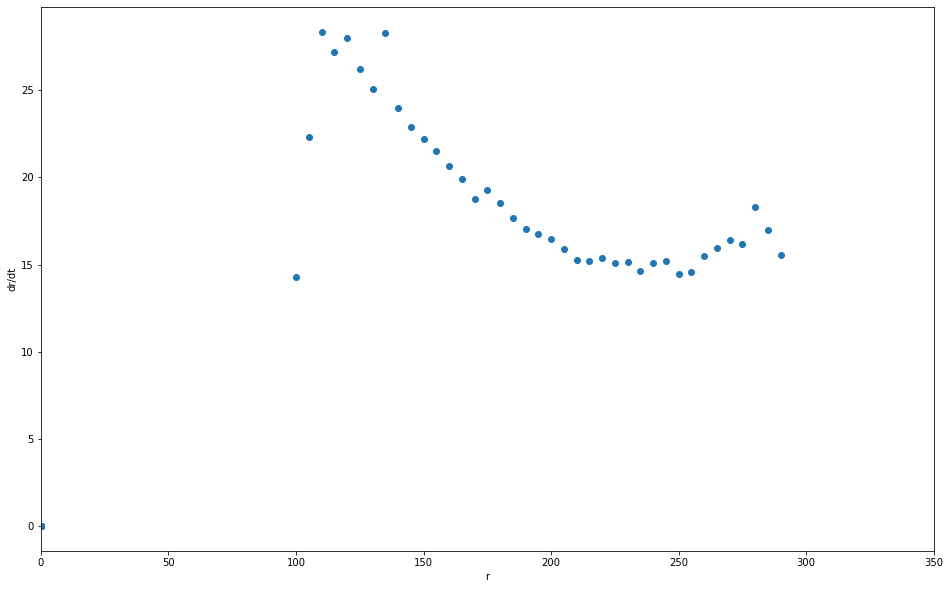

In [164]:
fig, ax = plt.subplots(figsize=(16, 10))
plt.xlabel("r")
plt.ylabel("dr/dt")
plt.xlim(0, 350)
ax.scatter(r_ur_err_1[:, 0]/10, r_ur_err_1[:, 2])

In [170]:
r_ur_in_1 = np.zeros((1, 2))
r_ur_in_2 = np.zeros((1, 2))
r_ur_in_3 = np.zeros((1, 2))
r_ur_in_15 = np.zeros((1, 2))
r_ur_in_25 = np.zeros((1, 2))

r_ur_urErr_1 = np.zeros((3501, 3))
r_ur_urErr_2 = np.zeros((3501, 3))
r_ur_urErr_3 = np.zeros((3501, 3))
r_ur_urErr_15 = np.zeros((3501, 3))
r_ur_urErr_25 = np.zeros((3501, 3))

r_ur_in_1[:, :] = np.nan
r_ur_in_2[:, :] = np.nan
r_ur_in_3[:, :] = np.nan
r_ur_in_15[:, :] = np.nan
r_ur_in_25[:, :] = np.nan

r_ur_urErr_1[:, :] = np.nan
r_ur_urErr_2[:, :] = np.nan
r_ur_urErr_3[:, :] = np.nan
r_ur_urErr_15[:, :] = np.nan
r_ur_urErr_25[:, :] = np.nan

In [171]:
for i in tqdm(range(0, 3501, 50)):
    res1_sort_l = res1_sort[np.where(res1_sort[:, 0] >= i/10)]
    res1_sort_lr = res1_sort_l[np.where(res1_sort_l[:, 0] < (i+_iter)/10)]

    columns = ['r', 'theta', 'u_r', 'u_theta']
    df = pd.DataFrame(data=res1_sort_lr, columns=columns, dtype='float')

    q1 = df['u_r'].quantile(0.25)
    q2 = df['u_r'].quantile(0.75)
    iqr = q2 - q1

    upper = q2 + 1.5 * iqr
    bottom = q1 - 1.5 * iqr
    _in = df[(df['u_r'] >= bottom) & (df['u_r'] <= upper)].values
    tmp = np.array([_in[:, 0], _in[:, 2]]).T
    r_ur_in_1 = np.vstack([r_ur_in_1, tmp])

    r_ur_urErr_1[i, 0] = i
    r_ur_urErr_1[i, 1] = np.mean(tmp, axis=0)[1]
    r_ur_urErr_1[i, 2] = np.std(tmp, axis=0)[1]

  0%|          | 0/71 [00:00<?, ?it/s]/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/numpy/core/_methods.py:252: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
100%|██████████| 71/71 [00:00<00:00, 75.92it/

In [172]:
for i in tqdm(range(0, 3501, 50)):
    res15_sort_l = res15_sort[np.where(res15_sort[:, 0] >= i/10)]
    res15_sort_lr = res15_sort_l[np.where(res15_sort_l[:, 0] < (i+_iter)/10)]

    columns = ['r', 'theta', 'u_r', 'u_theta']
    df = pd.DataFrame(data=res15_sort_lr, columns=columns, dtype='float')

    q1 = df['u_r'].quantile(0.25)
    q2 = df['u_r'].quantile(0.75)
    iqr = q2 - q1

    upper = q2 + 1.5 * iqr
    bottom = q1 - 1.5 * iqr
    _in = df[(df['u_r'] >= bottom) & (df['u_r'] <= upper)].values
    tmp = np.array([_in[:, 0], _in[:, 2]]).T
    r_ur_in_15 = np.vstack([r_ur_in_15, tmp])

    r_ur_urErr_15[i, 0] = i
    r_ur_urErr_15[i, 1] = np.mean(tmp, axis=0)[1]
    r_ur_urErr_15[i, 2] = np.std(tmp, axis=0)[1]

100%|██████████| 71/71 [00:00<00:00, 87.77it/s]


In [173]:
for i in tqdm(range(0, 3501, 50)):
    res2_sort_l = res2_sort[np.where(res2_sort[:, 0] >= i/10)]
    res2_sort_lr = res2_sort_l[np.where(res2_sort_l[:, 0] < (i+_iter)/10)]

    columns = ['r', 'theta', 'u_r', 'u_theta']
    df = pd.DataFrame(data=res2_sort_lr, columns=columns, dtype='float')

    q1 = df['u_r'].quantile(0.25)
    q2 = df['u_r'].quantile(0.75)
    iqr = q2 - q1

    upper = q2 + 1.5 * iqr
    bottom = q1 - 1.5 * iqr
    _in = df[(df['u_r'] >= bottom) & (df['u_r'] <= upper)].values
    tmp = np.array([_in[:, 0], _in[:, 2]]).T
    r_ur_in_2 = np.vstack([r_ur_in_2, tmp])

    r_ur_urErr_2[i, 0] = i
    r_ur_urErr_2[i, 1] = np.mean(tmp, axis=0)[1]
    r_ur_urErr_2[i, 2] = np.std(tmp, axis=0)[1]

100%|██████████| 71/71 [00:00<00:00, 117.30it/s]


In [174]:
for i in tqdm(range(0, 3501, 50)):
    res25_sort_l = res25_sort[np.where(res25_sort[:, 0] >= i/10)]
    res25_sort_lr = res25_sort_l[np.where(res25_sort_l[:, 0] < (i+_iter)/10)]

    columns = ['r', 'theta', 'u_r', 'u_theta']
    df = pd.DataFrame(data=res25_sort_lr, columns=columns, dtype='float')

    q1 = df['u_r'].quantile(0.25)
    q2 = df['u_r'].quantile(0.75)
    iqr = q2 - q1

    upper = q2 + 1.5 * iqr
    bottom = q1 - 1.5 * iqr
    _in = df[(df['u_r'] >= bottom) & (df['u_r'] <= upper)].values
    tmp = np.array([_in[:, 0], _in[:, 2]]).T
    r_ur_in_25 = np.vstack([r_ur_in_25, tmp])

    r_ur_urErr_25[i, 0] = i
    r_ur_urErr_25[i, 1] = np.mean(tmp, axis=0)[1]
    r_ur_urErr_25[i, 2] = np.std(tmp, axis=0)[1]

100%|██████████| 71/71 [00:00<00:00, 115.32it/s]


In [175]:
for i in tqdm(range(0, 3501, 50)):
    res3_sort_l = res3_sort[np.where(res3_sort[:, 0] >= i/10)]
    res3_sort_lr = res3_sort_l[np.where(res3_sort_l[:, 0] < (i+_iter)/10)]

    columns = ['r', 'theta', 'u_r', 'u_theta']
    df = pd.DataFrame(data=res3_sort_lr, columns=columns, dtype='float')

    q1 = df['u_r'].quantile(0.25)
    q2 = df['u_r'].quantile(0.75)
    iqr = q2 - q1

    upper = q2 + 1.5 * iqr
    bottom = q1 - 1.5 * iqr
    _in = df[(df['u_r'] >= bottom) & (df['u_r'] <= upper)].values
    tmp = np.array([_in[:, 0], _in[:, 2]]).T
    r_ur_in_3 = np.vstack([r_ur_in_3, tmp])

    r_ur_urErr_3[i, 0] = i
    r_ur_urErr_3[i, 1] = np.mean(tmp, axis=0)[1]
    r_ur_urErr_3[i, 2] = np.std(tmp, axis=0)[1]

  0%|          | 0/71 [00:00<?, ?it/s]/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/numpy/core/_methods.py:252: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
100%|██████████| 71/71 [00:00<00:00, 93.92it/

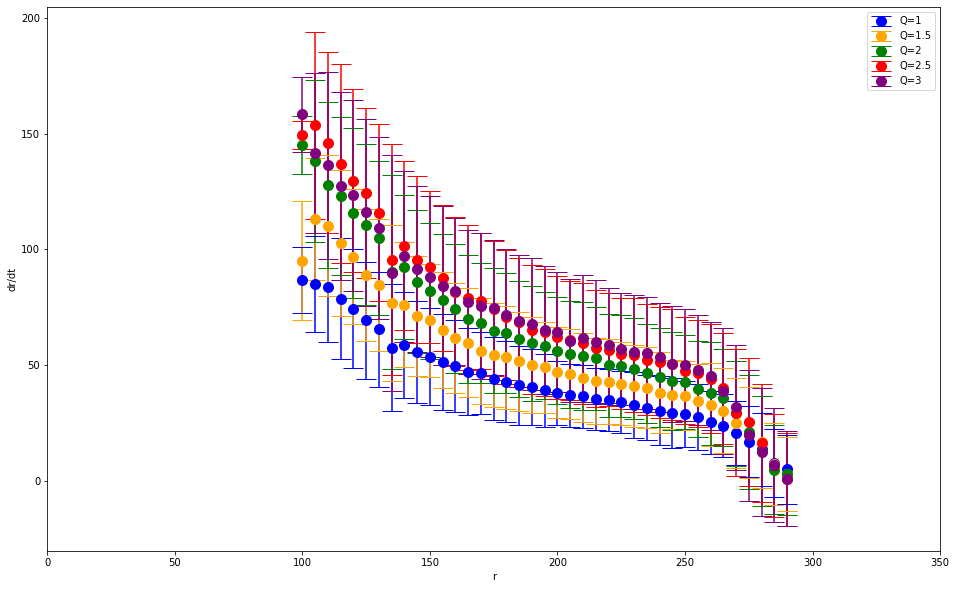

In [176]:
fig, ax = plt.subplots(figsize=(16, 10))
plt.xlabel("r")
plt.ylabel("dr/dt")
plt.xlim(0, 350)

ax.errorbar(r_ur_urErr_1[:, 0]/10, r_ur_urErr_1[:, 1], yerr=r_ur_urErr_1[:, 2], capsize=10, fmt='o', markersize=10, ecolor='b', markeredgecolor="b", color='b', label="Q=1")
ax.errorbar(r_ur_urErr_15[:, 0]/10, r_ur_urErr_15[:, 1], yerr=r_ur_urErr_15[:, 2], capsize=10, fmt='o', markersize=10, ecolor='orange', markeredgecolor="orange", color='orange', label="Q=1.5")
ax.errorbar(r_ur_urErr_2[:, 0]/10, r_ur_urErr_2[:, 1], yerr=r_ur_urErr_2[:, 2], capsize=10, fmt='o', markersize=10, ecolor='g', markeredgecolor="g", color='g', label="Q=2")
ax.errorbar(r_ur_urErr_25[:, 0]/10, r_ur_urErr_25[:, 1], yerr=r_ur_urErr_25[:, 2], capsize=10, fmt='o', markersize=10, ecolor='r', markeredgecolor="r", color='r', label="Q=2.5")
ax.errorbar(r_ur_urErr_3[:, 0]/10, r_ur_urErr_3[:, 1], yerr=r_ur_urErr_3[:, 2], capsize=10, fmt='o', markersize=10, ecolor='purple', markeredgecolor="purple", color='purple', label="Q=3")

plt.legend()

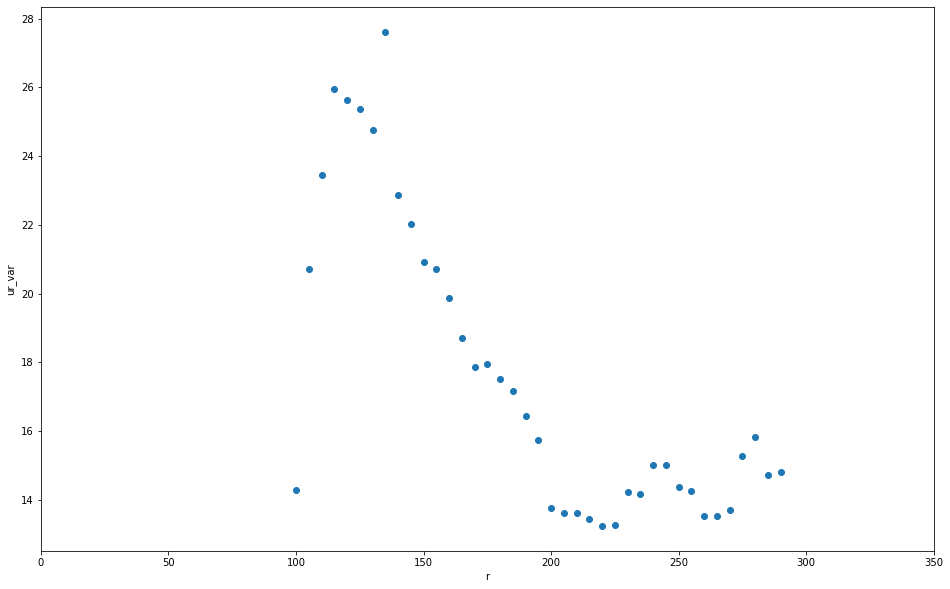

In [177]:
fig, ax = plt.subplots(figsize=(16, 10))
plt.xlabel("r")
plt.ylabel("ur_var")
plt.xlim(0, 350)
ax.scatter(r_ur_urErr_1[:, 0]/10, r_ur_urErr_1[:, 2])

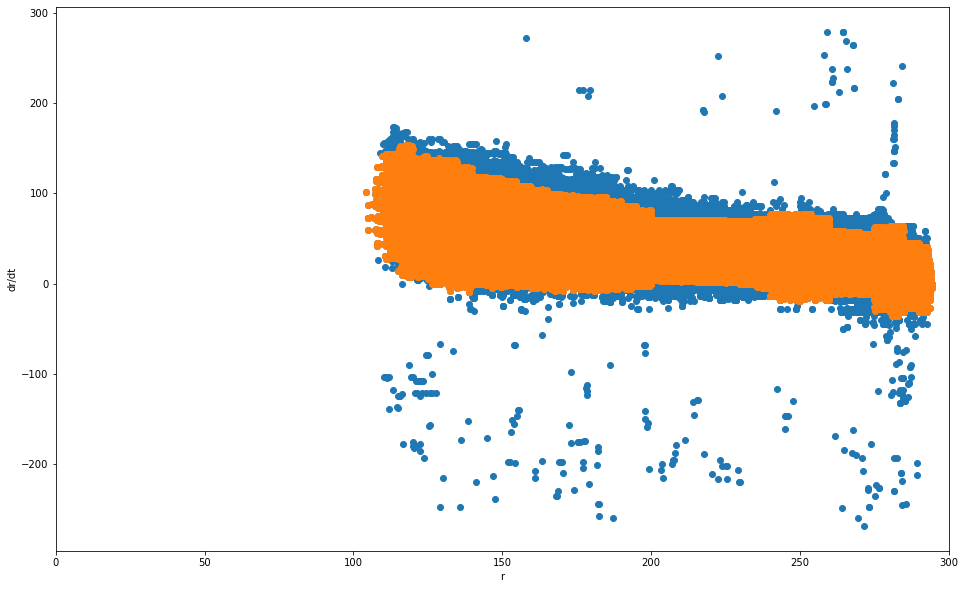

In [178]:
fig, ax = plt.subplots(figsize=(16, 10))
plt.xlabel("r")
plt.ylabel("dr/dt")
plt.xlim(0, 300)
ax.scatter(res1[:, 0], res1[:, 2], alpha=1, zorder=1)
ax.scatter(r_ur_in_1[:, 0], r_ur_in_1[:, 1], alpha=1, zorder=2)
plt.show()

In [180]:
with open('res1.pickle', mode='wb') as fp:
    pickle.dump(res1, fp)

with open('res2.pickle', mode='wb') as fp:
    pickle.dump(res2, fp)

with open('res3.pickle', mode='wb') as fp:
    pickle.dump(res3, fp)

with open('res15.pickle', mode='wb') as fp:
    pickle.dump(res15, fp)

with open('res25.pickle', mode='wb') as fp:
    pickle.dump(res25, fp)

In [181]:
with open('r_ur_urErr_1.pickle', mode='wb') as fp:
    pickle.dump(r_ur_urErr_1, fp)

with open('r_ur_urErr_2.pickle', mode='wb') as fp:
    pickle.dump(r_ur_urErr_2, fp)

with open('r_ur_urErr_3.pickle', mode='wb') as fp:
    pickle.dump(r_ur_urErr_3, fp)

with open('r_ur_urErr_15.pickle', mode='wb') as fp:
    pickle.dump(r_ur_urErr_15, fp)

with open('r_ur_urErr_25.pickle', mode='wb') as fp:
    pickle.dump(r_ur_urErr_25, fp)

In [182]:
with open('r_ur_in_1.pickle', mode='wb') as fp:
    pickle.dump(r_ur_in_1, fp)

with open('r_ur_in_2.pickle', mode='wb') as fp:
    pickle.dump(r_ur_in_2, fp)

with open('r_ur_in_3.pickle', mode='wb') as fp:
    pickle.dump(r_ur_in_3, fp)

with open('r_ur_in_15.pickle', mode='wb') as fp:
    pickle.dump(r_ur_in_15, fp)

with open('r_ur_in_25.pickle', mode='wb') as fp:
    pickle.dump(r_ur_in_25, fp)